In [1]:
# import all the E9 stuff
import logging
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# User defined modules
E9path = Path("C:/", "Users", "ken92", "Documents", "Studies", "E5", "simulation", "E9_simulations")
if str(E9path) not in sys.path:
    sys.path.insert(1, str(E9path))
import E9_fn.E9_constants as E9c
import E9_fn.E9_atom as E9a
import E9_fn.E9_cooltrap as E9ct
import E9_fn.polarizabilities_calculation as E9pol
import E9_fn.datasets.transition_line_data as TLData
from E9_fn import util

# Logging
logpath = '' # '' if not logging to a file
loglevel = logging.INFO
logroot = logging.getLogger()
list(map(logroot.removeHandler, logroot.handlers))
list(map(logroot.removeFilter, logroot.filters))
logging.basicConfig(filename = logpath, level = loglevel)

c:\Users\ken92\Documents\Studies\E5\simulation\E9_simulations\.venv\Lib\site-packages\gftool\precision.py:16: UserWarning: No quad precision datatypes available!
Some functions might be less accurate.
  warnings.warn("No quad precision datatypes available!\n"


In [2]:
# Plot parameters are in their own sections below
pol_SI2au = 1/1.64877727436e-41                                     # Conversion factor from SI to a.u. for polarizability
wavelengths = np.arange(400, 1600, 0.001) * 1e-9
print_KRb_ratio_wavelengths = [532e-9, 760e-9, 1064e-9]
beam_waist = 50e-6                                                  # the RADIUS of the beam at 1/e^2 intensity
peak_E2 = 2 * util.I_from_power(1, beam_waist) / E9c.c_light / E9c.epsilon_0     # |E|**2, assuming a gaussian beam and 1W of optical power
alpha2kHz = peak_E2 / 4 / pol_SI2au / E9c.hnobar / 1000                 # Convert from alpha (in a.u.) to trap depth, in kHz
alpha2uK = peak_E2 / 4 / pol_SI2au / E9c.k_B * 1e6                      # Convert from alpha (in a.u.) to trap depth, in uK

# What lines to use
K_4S1o2_LOI = TLData.K_4S1o2_lines                                         # Use K_4S1o2_lines to include all lines
K_4P1o2_LOI = TLData.K_4P1o2_lines                                         # Use K_4P1o2_lines to include all lines
K_4P3o2_LOI = TLData.K_4P3o2_lines                                         # Use K_4P3o2_lines to include all lines
Rb_5S1o2_LOI = TLData.Rb_D12_doublet                                      # Use Rb_5S1o2_lines to include all lines

In [3]:
def mark_important_lines(ax, lines, f_min, l_alpha = None, init_text_height = 0):
    """Label the important transitions on the plot.
    
    ax: an axes object where the lines are added to
    lines: a list of transition lines
    f_min: [dimless] minimum oscillator strength for a line to be considered important
    l_alpha: a line object to get color from
    init_text_height: related to how the text labels for transitions are cycled through in height"""
    y_min = ax.get_ylim()[0]
    text_ypos = init_text_height
    if l_alpha is None:
        vcolor = '#888888'
    else:
        vcolor = l_alpha.get_color()
        
    for line in lines:
        if line['f_ik'] is not None and line['f_ik'] >= f_min:
            lamb_nm, gs, es, iso = line['lambda'] * 1e9, line['gs'], line['es'], line['isotope']
            level_text = iso + gs.replace('o', '/') + '->' + es.replace('o', '/')
            ax.axvline(x = lamb_nm, color = vcolor, linestyle = ':', alpha = 0.7)
            ax.text(lamb_nm, y_min * (0.9 - 0.1 * (text_ypos % 8)), level_text, color = vcolor, fontsize = 12)
            text_ypos += 1
    ax.text(0.98, 0.02, 'Transitions with ' + r'$f_{ki}>$' + '{} are labeled'.format(f_min), transform=ax.transAxes,
            horizontalalignment = 'right', verticalalignment = 'bottom')

In [4]:
alpha_s_K_4S1o2 = E9pol.alpha_pol(0, wavelengths, K_4S1o2_LOI, '4S1o2')
alpha_s_Rb_5S1o2 = E9pol.alpha_pol(0, wavelengths, Rb_5S1o2_LOI, '5S1o2')
alpha_s_K_4P1o2 = E9pol.alpha_pol(0, wavelengths, K_4P1o2_LOI, '4P1o2')
alpha_s_K_4P3o2 = E9pol.alpha_pol(0, wavelengths, K_4P3o2_LOI, '4P3o2')

# alpha_v_K_4S1o2 = E9pol.alpha_pol(1, wavelengths, K_4S1o2_lines, '4S1o2')
alpha_v_K_4S1o2_F9o2 = E9pol.alpha_pol(1, wavelengths, K_4S1o2_LOI, '4S1o2', F = 9/2, I = 4)
alpha_v_K_4S1o2_F7o2 = E9pol.alpha_pol(1, wavelengths, K_4S1o2_LOI, '4S1o2', F = 7/2, I = 4)
alpha_v_Rb_5S1o2_F2 = E9pol.alpha_pol(1, wavelengths, Rb_5S1o2_LOI, '5S1o2', F = 2, I = 3/2)
alpha_v_Rb_5S1o2_F1 = E9pol.alpha_pol(1, wavelengths, Rb_5S1o2_LOI, '5S1o2', F = 1, I = 3/2)

avoas_K_4S1o2_F9o2 = alpha_v_K_4S1o2_F9o2/alpha_s_K_4S1o2
avoas_Rb_5S1o2_F2 = alpha_v_Rb_5S1o2_F2/alpha_s_Rb_5S1o2
avoas_Rb_5S1o2_F1 = alpha_v_Rb_5S1o2_F1/alpha_s_Rb_5S1o2

print_KRb_ratio_indices = [np.argmin(np.abs(wavelengths - wl)) for wl in print_KRb_ratio_wavelengths]

INFO:root:K_4S1o2_3D5o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_3D5o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_4D5o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_4D3o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_3D5o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_3D5o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_4D5o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_4D3o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_3D5o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_3D5o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_4D5o2 transition does not have f_ik data (not E1 allowed?)
INFO:root:K_4S1o2_4D3o2 transition does not have f_ik data (not E1 allowed?)


# Scalar polarizability

In [5]:
# inputs
ylim_s = 2e3
notable_f = 0.001
mark_line_bool = True

(K-4S1/2 pol) / (Rb-5S1/2 pol):
      532.00 nm | 0.993273
      760.00 nm | 2.903561
     1064.00 nm | 0.874507


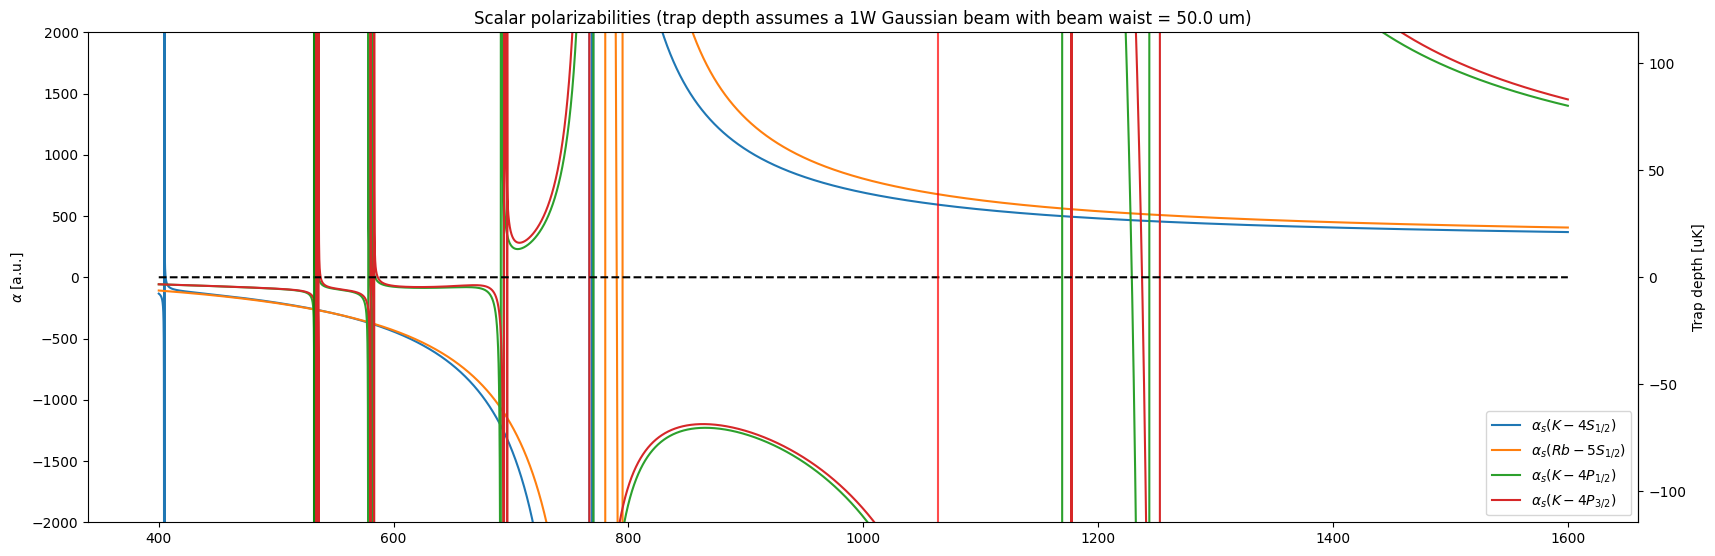

In [10]:
fig_alpha = plt.figure(0, figsize = (20,14))
fig_alpha.clf()
ax_s = fig_alpha.add_subplot(211)
ax_s.set_ylim(-ylim_s, ylim_s)
l_K_4S1o2 = ax_s.plot(wavelengths * 1e9, alpha_s_K_4S1o2 * pol_SI2au, label = r'$\alpha_s(K-4S_{1/2})$')
l_Rb_5S1o2 = ax_s.plot(wavelengths * 1e9, alpha_s_Rb_5S1o2 * pol_SI2au, label = r'$\alpha_s(Rb-5S_{1/2})$')
l_4P1o2 = ax_s.plot(wavelengths * 1e9, alpha_s_K_4P1o2 * pol_SI2au, label = r'$\alpha_s(K-4P_{1/2})$')
l_4P3o2 = ax_s.plot(wavelengths * 1e9, alpha_s_K_4P3o2 * pol_SI2au, label = r'$\alpha_s(K-4P_{3/2})$')
if mark_line_bool:
    mark_important_lines(ax_s, TLData.K_4S1o2_lines, notable_f, l_alpha = l_K_4S1o2[0])
    mark_important_lines(ax_s, TLData.Rb_5S1o2_lines, notable_f, l_alpha = l_Rb_5S1o2[0], init_text_height = 1)
    # mark_important_lines(ax_s, K_4P1o2_lines, notable_f, l_alpha = l_4P1o2[0], init_text_height = 4)
    # mark_important_lines(ax_s, K_4P3o2_lines, notable_f, l_alpha = l_4P3o2[0], init_text_height = 6)
ax_s.plot(wavelengths * 1e9, np.zeros_like(wavelengths), 'k--')
ax_s.axvline(x = E9c.lambda_sw * 1e9, color = 'green', alpha = 0.7, linestyle = '-')
ax_s.axvline(x = E9c.lambda_lw * 1e9, color = 'red', alpha = 0.7, linestyle = '-')
ax_s.set_title('Scalar polarizabilities (trap depth assumes a 1W Gaussian beam with beam waist = {:.1f} um)'.format(beam_waist * 1e6))
ax_s.set_ylabel(r'$\alpha$' + ' [a.u.]')
ax_s.legend()

# Add a secondary axis to calculate effective trap depth (at Gaussian beam center)
ryax_s = ax_s.secondary_yaxis('right', functions = (lambda x: x * alpha2uK, lambda x: x / alpha2uK))
ryax_s.set_ylabel('Trap depth [uK]')

print("(K-4S1/2 pol) / (Rb-5S1/2 pol):")
for wl_idx in print_KRb_ratio_indices:
    wl = wavelengths[wl_idx]
    K_4S1o2_alpha = alpha_s_K_4S1o2[wl_idx] * pol_SI2au
    Rb_5S1o2_alpha = alpha_s_Rb_5S1o2[wl_idx] * pol_SI2au
    ratio = K_4S1o2_alpha / Rb_5S1o2_alpha
    print(f'    {wl * 1e9: >8.2f} nm | {ratio:.6f}')

# Vector polarizability

In [7]:
ylim_v = 20
mark_line_bool = False

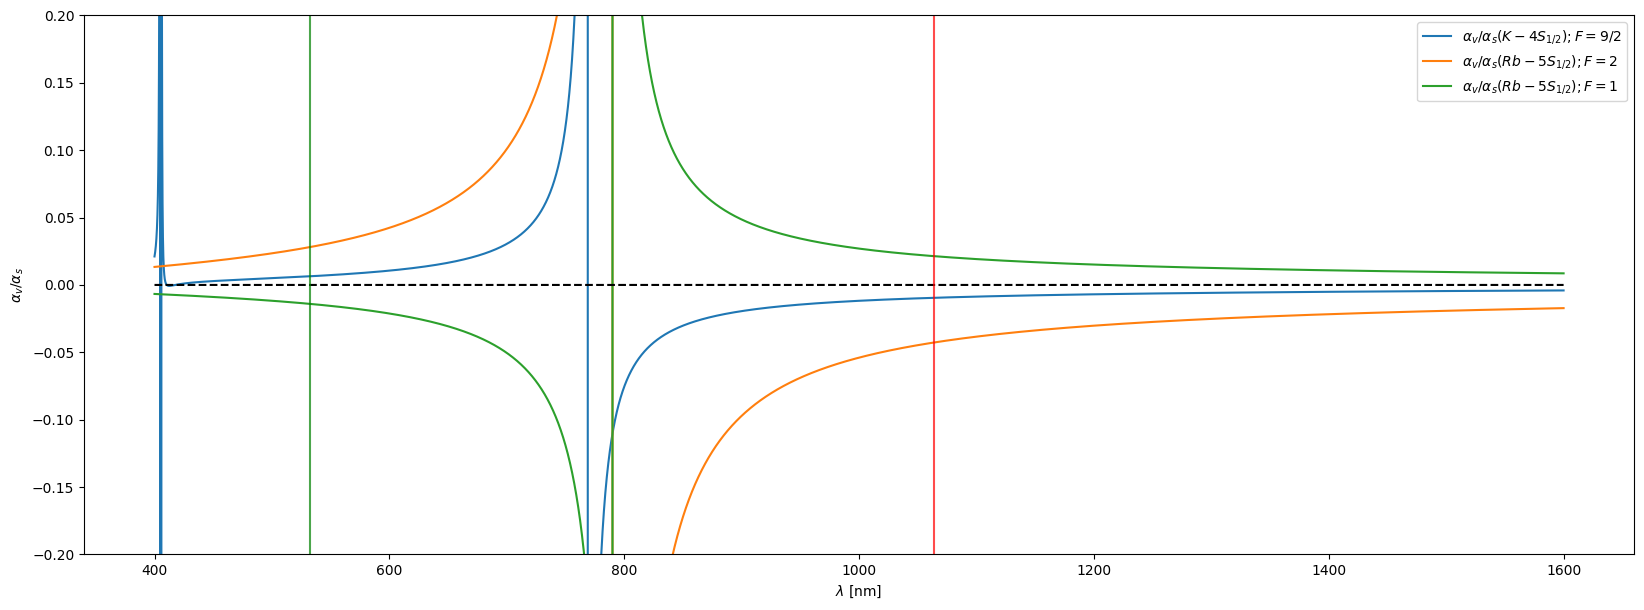

In [8]:
ax_v = fig_alpha.add_subplot(212)
ax_v.set_ylim(-ylim_v, ylim_v)
# ax_v.plot(wavelengths * 1e9, alpha_v_K_4S1o2 * pol_SI2au, label = r'$\alpha_v(K-4S_{1/2})$')
ax_v.plot(wavelengths * 1e9, alpha_v_K_4S1o2_F9o2 * pol_SI2au, label = r'$\alpha_v(K-4S_{1/2}; F = 9/2)$')
ax_v.plot(wavelengths * 1e9, alpha_v_K_4S1o2_F7o2 * pol_SI2au, label = r'$\alpha_v(K-4S_{1/2}; F = 7/2)$')
ax_v.plot(wavelengths * 1e9, alpha_v_Rb_5S1o2_F2 * pol_SI2au, label = r'$\alpha_v(Rb-5S_{1/2}; F = 2)$')
ax_v.plot(wavelengths * 1e9, alpha_v_Rb_5S1o2_F1 * pol_SI2au, label = r'$\alpha_v(Rb-5S_{1/2}; F = 1)$')
if mark_line_bool:
    mark_important_lines(ax_v, TLData.K_4S1o2_lines, notable_f)
    mark_important_lines(ax_v, TLData.Rb_5S1o2_lines, notable_f, init_text_height = 2)
ax_v.plot(wavelengths * 1e9, np.zeros_like(wavelengths), 'k--')
ax_v.axvline(x = E9c.lambda_sw * 1e9, color = 'green', alpha = 0.7, linestyle = '-')
ax_v.axvline(x = E9c.lambda_lw * 1e9, color = 'red', alpha = 0.7, linestyle = '-')
ax_v.set_title('Vector polarizabilities')
ax_v.set_xlabel(r'$\lambda$' + ' [nm]')
ax_v.set_ylabel(r'$\alpha$' + ' [a.u.]')
ax_v.legend(loc = 'upper right')

# The factor of 1/2 is cancelled out by the difference in polarization
ryax_v = ax_v.secondary_yaxis('right', functions = (lambda x: x * alpha2kHz, lambda x: x / alpha2kHz))
ryax_v.set_ylabel(r'$\Delta_{\sigma^+ - \sigma^-}/m_F$' + ' [kHz]')

#%% Plot (things derived from alphas)
fig_r = plt.figure(1, figsize = (20,7))
fig_r.clf()
ax_r = fig_r.add_subplot(111)
ax_r.set_ylim(-0.2, 0.2)
ax_r.plot(wavelengths * 1e9, avoas_K_4S1o2_F9o2, label = r'$\alpha_v/\alpha_s(K-4S_{1/2}); F = 9/2$')
ax_r.plot(wavelengths * 1e9, avoas_Rb_5S1o2_F2, label = r'$\alpha_v/\alpha_s(Rb-5S_{1/2}); F = 2$')
ax_r.plot(wavelengths * 1e9, avoas_Rb_5S1o2_F1, label = r'$\alpha_v/\alpha_s(Rb-5S_{1/2}); F = 1$')
ax_r.plot(wavelengths * 1e9, np.zeros_like(wavelengths), 'k--')
ax_r.axvline(x = E9c.lambda_sw * 1e9, color = 'green', alpha = 0.7, linestyle = '-')
ax_r.axvline(x = E9c.lambda_lw * 1e9, color = 'red', alpha = 0.7, linestyle = '-')
ax_r.set_xlabel(r'$\lambda$' + ' [nm]')
ax_r.set_ylabel(r'$\alpha_v/\alpha_s$')
ax_r.legend()